# Importing Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
!file -i /content/newsfeed.csv

/content/newsfeed.csv: text/csv; charset=utf-8


In [49]:
df = pd.read_csv('/content/newsfeed.csv', encoding='utf-8')
df.sample(10)

,Body,category
1505,الشرق اوسط واشنطن جدد دعم يمن مكافح ارهاب الجن...,1
1969,الشرق اوسط المبعوث امريك ميتشل جتمع وزير دفاع ...,1
2628,العالم مصادر رزا مانع جراء جول نتخاب ثانيه مصا...,2
44,الشرق اوسط ميليباند حكم اير مسال خص شعبها كد ز...,1
2938,العالم انتقاد عامل شرط دنمارك تظاهر مترافق قم ...,2
2807,العالم لندن خطط سليم افغانس حكوم الافغانيه رءي...,2
2195,العالم هجم معلومات جديد ضد وريا جنوبيه كوريا ت...,2
2925,العالم بتريوس عنف فوضي صاعد افغانستان الجنرال ...,2
437,الشرق اوسط خامنءي زعماء معارض عملاء مرشد ثور ا...,1
1040,الشرق اوسط الاحزاب سودان تبادل اتهام استفزاز ن...,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      4250 non-null   object
 1   category  4250 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.5+ KB


<Axes: ylabel='count'>

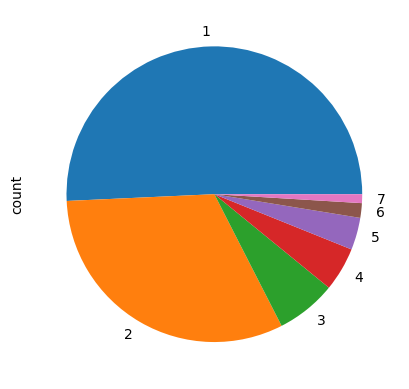

In [51]:
df['category'].value_counts().plot(kind='pie')

In [52]:
corpus = []
for i in range(0, len(df)):
    review = df['Body'][i]
    corpus.append(review)

In [53]:
len(corpus[1])

1646

In [55]:
### Vocabulary size
voc_size=1000

In [56]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [58]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=None)
print(embedded_docs)

[[  0   0   0 ... 900 727 578]
 [  0   0   0 ... 198 174  12]
 [  0   0   0 ...   4 351 251]
 ...
 [  0   0   0 ...   4 891 942]
 [  0   0   0 ... 883  21 805]
 [  0   0   0 ... 854 807 196]]


In [59]:
sequence_lengths = [len(seq) for seq in onehot_repr]

# Find the maximum sequence length
maxlen = np.max(sequence_lengths)
print("Maximum sequence length:", maxlen)

Maximum sequence length: 3090


In [60]:
embedding_vector_features = 1000
input_length = 3090  # Sequence length
num_classes = 8  # the number of classes you have

# Creating the model
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=input_length))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(128))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# Compiling the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [61]:
len(embedded_docs)

4250

In [62]:
df['category'].shape

(4250,)

In [63]:
import numpy as np
X=np.array(embedded_docs)
y=np.array(df['category'])

In [64]:
X

array([[  0,   0,   0, ..., 900, 727, 578],
       [  0,   0,   0, ..., 198, 174,  12],
       [  0,   0,   0, ...,   4, 351, 251],
       ...,
       [  0,   0,   0, ...,   4, 891, 942],
       [  0,   0,   0, ..., 883,  21, 805],
       [  0,   0,   0, ..., 854, 807, 196]], dtype=int32)

In [65]:
y

array([1, 1, 1, ..., 6, 6, 6])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training, 20% testing

In [67]:
X_train.shape

(3400, 3090)

In [68]:
y_train.shape

(3400,)

In [69]:
y_train

array([1, 1, 1, ..., 1, 2, 2])

In [70]:
max_value = y_train.max()
max_value

7

In [71]:
y_test

array([2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 4,
       1, 7, 2, 2, 3, 4, 1, 1, 7, 1, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 2, 1,
       6, 2, 2, 1, 1, 1, 1, 1, 4, 5, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 3, 1, 2, 2, 1, 1, 2, 2, 1, 4, 1, 3,
       2, 3, 2, 1, 5, 1, 2, 2, 1, 1, 1, 2, 2, 6, 1, 1, 1, 2, 3, 1, 2, 1,
       1, 4, 4, 1, 4, 5, 1, 1, 1, 2, 1, 2, 1, 1, 5, 2, 1, 1, 3, 1, 1, 1,
       2, 1, 3, 1, 1, 2, 1, 1, 2, 5, 1, 2, 7, 1, 3, 4, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 3, 4, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2,
       2, 4, 1, 5, 1, 1, 1, 2, 2, 1, 2, 1, 1, 4, 2, 2, 1, 2, 1, 2, 2, 3,
       2, 1, 2, 4, 1, 2, 4, 2, 4, 2, 1, 1, 1, 1, 3, 5, 2, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 1, 4, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 5, 1, 5, 2, 1,
       6, 1, 1, 4, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 4, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 4, 2, 1, 1, 1, 2, 1, 1, 5,

In [72]:
y_train = to_categorical(y_train, max_value+1)
y_test = to_categorical(y_test, max_value+1)

In [73]:
epochs=25
batch_size=64
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/25
54/54 [==============================] - 30s 454ms/step - loss: 1.2874 - accuracy: 0.5044 - val_loss: 1.0933 - val_accuracy: 0.5588
Epoch 2/25
54/54 [==============================] - 24s 450ms/step - loss: 0.9141 - accuracy: 0.6826 - val_loss: 0.9875 - val_accuracy: 0.6388
Epoch 3/25
54/54 [==============================] - 23s 424ms/step - loss: 0.7468 - accuracy: 0.7444 - val_loss: 0.8792 - val_accuracy: 0.7094
Epoch 4/25
54/54 [==============================] - 23s 427ms/step - loss: 0.6307 - accuracy: 0.8053 - val_loss: 0.8171 - val_accuracy: 0.7306
Epoch 5/25
54/54 [==============================] - 23s 425ms/step - loss: 0.6089 - accuracy: 0.8076 - val_loss: 0.9673 - val_accuracy: 0.7106
Epoch 6/25
54/54 [==============================] - 23s 435ms/step - loss: 0.4943 - accuracy: 0.8506 - val_loss: 1.2213 - val_accuracy: 0.6800
Epoch 7/25
54/54 [==============================] - 23s 432ms/step - loss: 0.4876 - accuracy: 0.8503 - val_loss: 0.9901 - val_accuracy: 0.7176

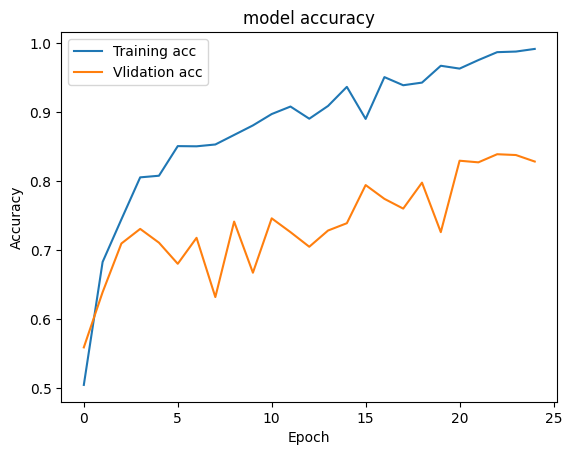

In [74]:
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'],label='Vlidation acc')
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


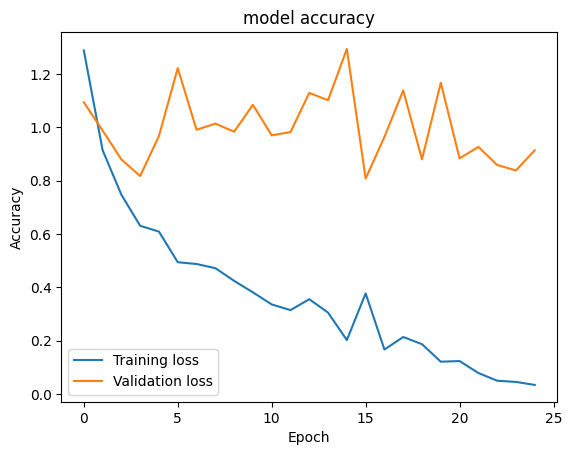

In [75]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [83]:
# Make predictions on the test data
predictions_prob = model.predict(X_test)
predictions = np.argmax(predictions_prob, axis=1)

27/27 [==============================] - 3s 111ms/step


In [84]:
true_labels = np.argmax(y_test, axis=1)

In [85]:


# Generate the classification report
report = classification_report(true_labels, predictions)
print(report)

              precision    recall  f1-score   support

           1       0.93      0.96      0.94       429
           2       0.77      0.81      0.79       260
           3       0.73      0.60      0.66        58
           4       0.41      0.33      0.37        52
           5       0.91      0.91      0.91        33
           6       0.12      0.08      0.10        13
           7       0.00      0.00      0.00         5

    accuracy                           0.83       850
   macro avg       0.55      0.53      0.54       850
weighted avg       0.82      0.83      0.82       850



In [87]:


# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)


In [92]:
class_names = ['Middle East News', 'World News', 'Business and Economy', 'Sports', 'Press Review', 'Science and Technology', 'Miscellaneous']

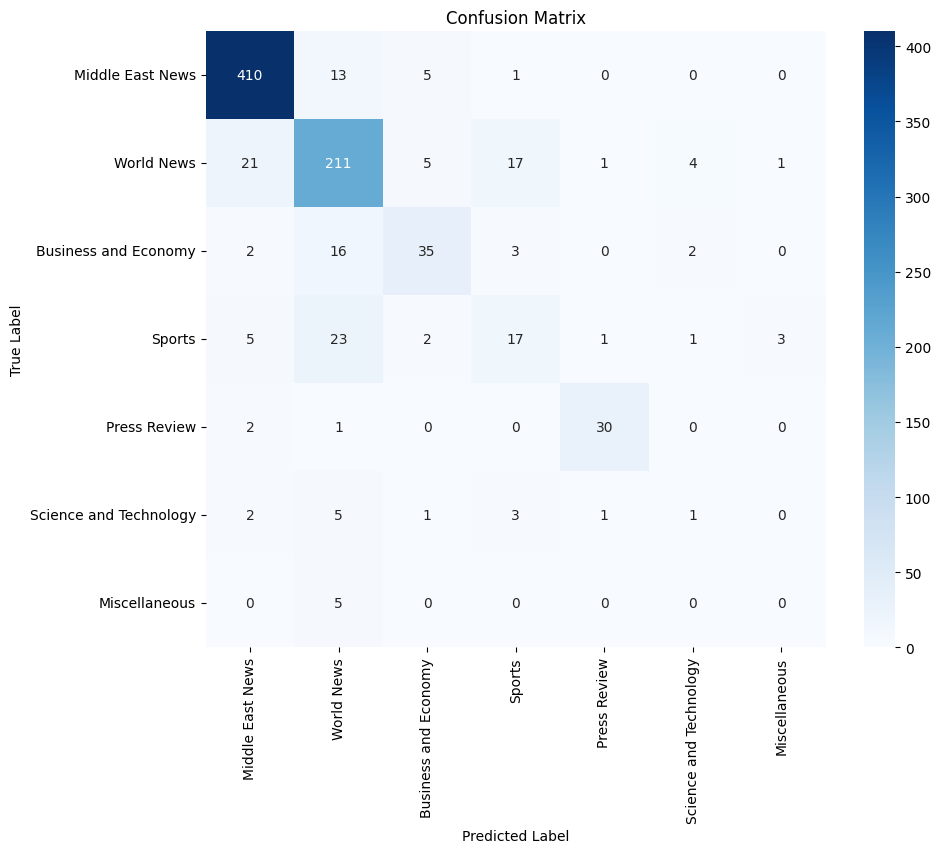

In [93]:


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()